In [1]:
import pandas as pd
import numpy as np
from pca import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_excel("Book1.xlsx")
data = dataframe.to_numpy()
dataframe.head(1)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


In [3]:
def cosine_similarity(matrix1, matrix2):
    result = 0
    for index in range(len(matrix1)):
            dot_product = np.dot(matrix1[index], matrix2[index])
            norm_vec1 = np.linalg.norm(matrix1[index])
            norm_vec2 = np.linalg.norm(matrix2[index])
            cosine =  dot_product / (norm_vec1 * norm_vec2) 
            if cosine== 0: 
                  print("cosine is equal to zero")
            result +=cosine

    result/= len(matrix1) 
    return result
def info(data,reversed_data):
      print("cosine similiarity for data:\n",cosine_similarity(data,reversed_data),"\nMean Squared Error for data:\n",round(np.mean((data - reversed_data)**2),9))
      return round(np.mean((data - reversed_data)**2),9)


In [4]:
pca = PCA(n_components=1)
pca.fit(data)
reduced_data = pca.transform(data)
reversed_data = pca.reverse(reduced_data)
info(data,reversed_data)

cosine similiarity for data:
 0.9454571529272258 
Mean Squared Error for data:
 4069820.677375702


4069820.677375702

In [5]:
data[0],reversed_data[0]

(array([  90.2 ,   10.  ,    7.58,   44.9 , 1610.  ,    9.44,   56.2 ,
           5.82,  553.  ]),
 array([  54.26736157,   30.97654814,    6.31491266,   44.62366416,
        2744.10861662,    9.29966847,   66.31822287,    3.51854619,
        -646.95041244]))

In [6]:
eig_values = pca.eigen_values

In [7]:
def variance(eig_values):
    result = eig_values / eig_values.sum()
    return result

In [8]:
variance(eig_values)

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

In [9]:
mse_list = []
for i in range(1,9):
    pca = PCA(n_components=i)
    pca.fit(data)
    trans_data = pca.transform(data)
    rev_data = pca.reverse(trans_data)
    var = variance(pca.eigen_values)
    mse = info(data, rev_data)
    mse_list.append(mse)

cosine similiarity for data:
 0.9454571529272258 
Mean Squared Error for data:
 4069820.677375702
cosine similiarity for data:
 0.9997878560678457 
Mean Squared Error for data:
 271.553193359
cosine similiarity for data:
 0.9999503718206387 
Mean Squared Error for data:
 133.387881984
cosine similiarity for data:
 0.9999819694978375 
Mean Squared Error for data:
 25.002097448
cosine similiarity for data:
 0.9999937181178694 
Mean Squared Error for data:
 10.075543726
cosine similiarity for data:
 0.9999986311438444 
Mean Squared Error for data:
 1.958457579
cosine similiarity for data:
 0.9999995363678024 
Mean Squared Error for data:
 0.535648447
cosine similiarity for data:
 0.9999999105637879 
Mean Squared Error for data:
 0.067593732


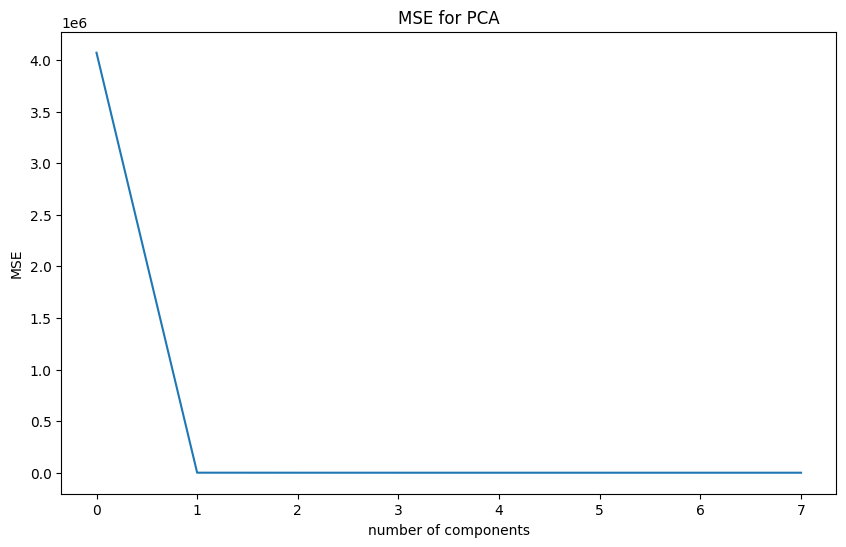

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(mse_list)
plt.xlabel('number of components')
plt.ylabel('MSE')s
plt.title('MSE for PCA')
plt.show()